## 스택

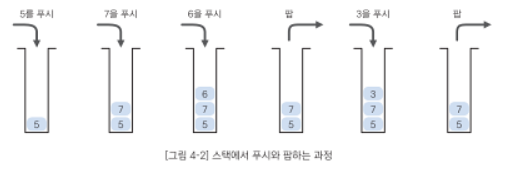

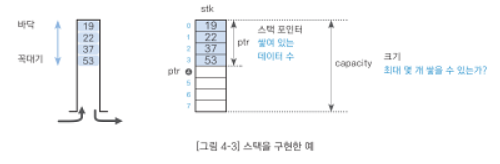

#### 실습 4-1

In [9]:
from typing import Any

class FixedStack:

  class Empty(Exception):
    pass

  class Full(Exception):
    pass
  
  def __init__(self, capacity : int = 256) -> None :
    self.stk = [None] * capacity
    self.capacity = capacity
    self.ptr = 0
  
  def __len__(self) -> int:
    return self.ptr
  
  def is_empty(self) -> bool:
    return self.ptr <= 0

  def is_full(self) -> bool:
    return self.ptr >= self.capacity

  def push(self, value : Any) -> None:
    if self.is_full():
      raise FixedStack.Full
    self.stk[self.ptr] = value
    self.ptr += 1
    
  def pop(self) -> Any:
    if self.is_empty():
      raise FixedStack.Empty
    self.ptr -= 1
    return self.stk[self.ptr]
  
  def peek(self) -> Any:
    if self.is_empty():
      raise FixedStack.Empty
    return self.stk[self.ptr -1]
  
  def clear(self) -> None:
    self.ptr = 0

  def find(self, value : Any) -> Any:
    for i in range(self.ptr -1 , -1, -1):
      if self.stk[i] == value:
        return i
    return -1

  def count(self, value : Any) -> bool:
    c = 0
    for i in range(self.ptr):
      if self.stk[i] == value :
        c += 1
    return c
  
  def __contains__(self, value: Any) -> bool:
    return self.count(value)
  
  def dump(self) -> None:
    if self.is_empty():
      print('스택이 비어있음.')
    else:
      print(self.stk[:self.ptr])

In [10]:
from enum import Enum

Menu = Enum('Menu', ['푸시', '팝', '피크', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep = '   ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)

s = FixedStack(64)  # 최대 64개를 푸시할 수 있는 스택

while True:
    print(f'현재 데이터 개수: {len(s)} / {s.capacity}')
    menu = select_menu()  # 메뉴 선택
    
    if menu == Menu.푸시:  # 푸시
        x = int(input('데이터를 입력하세요.: '))
        try:
            s.push(x)
        except FixedStack.Full:
            print('스택이 가득 차 있습니다.')

    elif menu == Menu.팝:  # 팝
        try:
            x = s.pop()
            print(f'팝한 데이터는 {x}입니다.')
        except FixedStack.Empty:
            print('스택이 비어 있습니다.')

    elif menu == Menu.피크:  # 피크
        try:
            x = s.peek()
            print(f'피크한 데이터는 {x}입니다.')
        except FixedStack.Empty:
            print('스택이 비어 있습니다.')

    elif menu == Menu.검색:  # 검색
        x = int(input('검색할 값을 입력하세요.: '))
        if x in s:
            print(f'{s.count(x)}개 포함되고, 맨 앞의 위치는 {s.find(x)}입니다.')
        else:
            print('검색값을 찾을 수 없습니다.')

    elif menu == Menu.덤프:  # 덤프
        s.dump()

    else:
        break

현재 데이터 개수: 0 / 64
(1)푸시   (2)팝   (3)피크   (4)검색   (5)덤프   (6)종료: 1
데이터를 입력하세요.: 0
현재 데이터 개수: 1 / 64
(1)푸시   (2)팝   (3)피크   (4)검색   (5)덤프   (6)종료: 1
데이터를 입력하세요.: 1
현재 데이터 개수: 2 / 64
(1)푸시   (2)팝   (3)피크   (4)검색   (5)덤프   (6)종료: 1
데이터를 입력하세요.: 2
현재 데이터 개수: 3 / 64
(1)푸시   (2)팝   (3)피크   (4)검색   (5)덤프   (6)종료: 1
데이터를 입력하세요.: 3
현재 데이터 개수: 4 / 64
(1)푸시   (2)팝   (3)피크   (4)검색   (5)덤프   (6)종료: 2
팝한 데이터는 3입니다.
현재 데이터 개수: 3 / 64
(1)푸시   (2)팝   (3)피크   (4)검색   (5)덤프   (6)종료: 3
피크한 데이터는 2입니다.
현재 데이터 개수: 3 / 64
(1)푸시   (2)팝   (3)피크   (4)검색   (5)덤프   (6)종료: 4
검색할 값을 입력하세요.: 1
1개 포함되고, 맨 앞의 위치는 1입니다.
현재 데이터 개수: 3 / 64
(1)푸시   (2)팝   (3)피크   (4)검색   (5)덤프   (6)종료: 5
[0, 1, 2]
현재 데이터 개수: 3 / 64
(1)푸시   (2)팝   (3)피크   (4)검색   (5)덤프   (6)종료: 6


#### 실습 4C-1

In [11]:
from typing import Any
from collections import deque

class Stack:

  def __init__(self, maxlen : int = 256) -> None:
    self.capacity = maxlen
    self.__stk = deque([], maxlen)

  def __len__(self) ->int:
    return len(self.__stk)

  def is_empty(self) ->bool:
    return not self.__stk
  
  def is_full(self) -> bool :
    return len(self.__stk) == self.__stk.maxlen

  def push(self, value : Any) -> None:
    self.__stk.append(value)
  
  def pop(self) -> Any:
    return self.__stk.pop()

  def peek(self) -> Any:
    return self.__stk[-1]
  
  def clear(self) -> None:
    self.__stk.clear()

  def find(self, value: Any) -> Any:
    try :
      return self.__stk.index(value)
    except ValueError:
      return -1
  
  def count(self, value : Any) -> int:
    return self.__stk.count(value)
  
  def __contains__(self, value : Any) -> bool:
    return self.count(value)
  
  def dump(self) -> int:
    print(list(self.__stk))

In [12]:
from enum import Enum

Menu = Enum('Menu', ['푸시', '팝', '피크', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep='  ', end='')
        n = int(input('：'))
        if 1 <= n <= len(Menu):
            return Menu(n)

s = Stack(64)  # 최대 64 개를 푸시할 수 있는 스택

while True:
    print(f'현재 데이터 개수：{len(s)} / {s.capacity}')
    menu = select_menu()  # 메뉴 선택

    if menu == Menu.푸시:  # 푸시
        x = int(input('데이터：'))
        try:
            s.push(x)
        except IndexError:
            print('스택이 가득 찼습니다.')

    elif menu == Menu.팝:  # 팝
        try:
            x = s.pop()
            print(f'팝한 데이터는 {x}입니다.')
        except IndexError:
           print('스택이 비어 있습니다.')

    elif menu == Menu.피크:  # 피크
        try:
            x = s.peek()
            print(f'피크한 데이터는 {x}입니다.')
        except IndexError:
           print('스택이 비어 있습니다.')

    elif menu == Menu.검색:  # 검색
        x = int(input('검색 값을 입력하세요：'))
        if x in s:
            print(f'{s.count(x)} 개를 포함하고, 맨 앞쪽의 위치는 {s.find(x)}입니다.')
        else:
            print('검색 값은 포함되어 있지 않습니다.')
            
    elif menu == Menu.덤프:  # 덤프
        s.dump()

    else:
        break

현재 데이터 개수：0 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：1
데이터：1
현재 데이터 개수：1 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：1
데이터：2
현재 데이터 개수：2 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：1
데이터：3
현재 데이터 개수：3 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：1
데이터：4
현재 데이터 개수：4 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：1
데이터：1
현재 데이터 개수：5 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：4
검색 값을 입력하세요：1
2 개를 포함하고, 맨 앞쪽의 위치는 0입니다.
현재 데이터 개수：5 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：2
팝한 데이터는 1입니다.
현재 데이터 개수：4 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：3
피크한 데이터는 4입니다.
현재 데이터 개수：4 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：5
[1, 2, 3, 4]
현재 데이터 개수：4 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료：6


## 큐

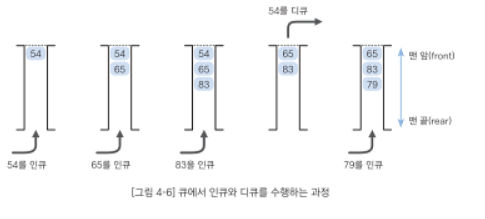

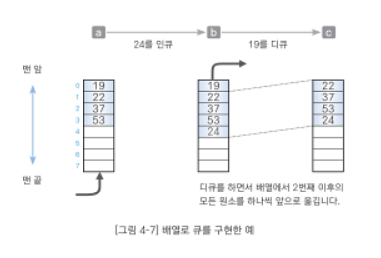

#### 링 버퍼로 큐 구현하기

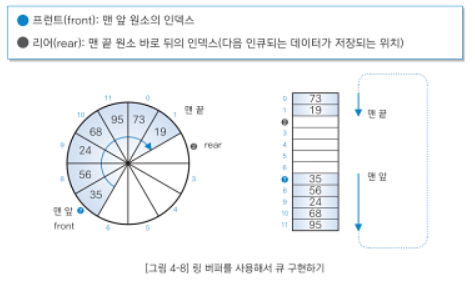

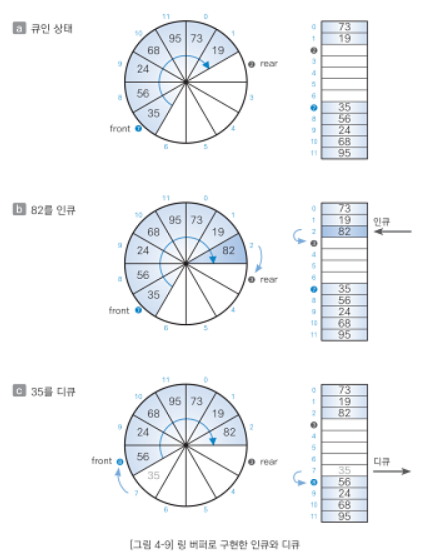

In [14]:
# 링버퍼로 큐를 구현하면 원소를 옮길 필요 없이 
# front 와 rear 값을 업데이트 하는 것만으로 인큐와 디큐를 수행할 수 있다.

In [24]:
from typing import Any 

class FixedQueue :

  class Empty(Exception) :
    pass
  
  class Empty(Exception) :
    pass

  def __init__(self, capacity : int) -> None :
    self.no = 0 # 현재 데이터 갯수
    self.front = 0 # 맨 앞 원소 커서
    self.rear = 0 # 맨 끝 원소 커서
    self.capacity = capacity # 큐의 크기
    self.que = [None] * capacity
  
  def __len__(self) -> int:
    return self.no
  
  def is_empty(self) -> bool :
    return self.no <= 0
  
  def is_full(self) -> bool:
    return self.no >= self.capacity

  def enque(self, x : Any) -> None:

    if self.is_full():
      raise FixedQueue.Full
    self.que[self.rear] = x
    self.rear += 1
    self.no += 1
    if self.rear == self.capacity:
      self.rear= 0
  
  def deque(self) -> Any:
    if self.is_empty():
      raise FixedQueue.Empty
    
    x = self.que[self.front]
    self.front += 1
    self.no -= 1
    if self.front == self.capacity:
      self.front = 0
    return x
  
  def peek(self) -> Any:
    if self.is_empty():
      raise FixedQueue.Empty
    return self.que[self.front]

  def find(self, value: Any) -> Any:
    for i in range(self.no):
      idx = (i + self.front) % self.capacity
      if self.que[idx] == value:
        return idx
    return -1
  
  def count(self, value : Any) ->bool:
    c = 0
    for i in range(self.no):  
       idx = (i + self.front) % self.capacity
       if self.que[idx] == value:
        c += 1
    return c
  
  def __contains__(self, value : Any) -> bool:
    return self.count(value)
  
  def clear(self) -> None :
    self.no = self.front = self.rear = 0
  
  def dump(self) -> None :
    if self.is_empty():
      print('큐가 비었음.')
    else :
      for i in range(self.no):
          print(self.que[(i + self.front) % self.capacity], end='')
      print()

In [22]:
from enum import Enum

Menu = Enum('Menu', ['인큐', '디큐', '피크', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep='   ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)

q = FixedQueue(64)  # 최대 64개를 인큐할 수 있는 큐 생성(고정 길이)

while True:
    print(f'현재 데이터 개수: {len(q)} / {q.capacity}')
    menu = select_menu()   # 메뉴 선택

    if menu == Menu.인큐:  # 인큐
        x = int(input('인큐할 데이터를 입력하세요.: '))
        try:
            q.enque(x)
        except FixedQueue.Full:
            print('큐가 가득 찼습니다.')

    elif menu == Menu.디큐:  # 디큐
        try:
            x = q.deque()
            print(f'디큐한 데이터는 {x}입니다.')
        except FixedQueue.Empty:
            print('큐가 비어 있습니다.')

    elif menu == Menu.피크:  # 피크
        try:
            x = q.peek()
            print(f'피크한 데이터는 {x}입니다.')
        except FixedQueue.Empty:
            print('큐가 비었습니다.')

    elif menu == Menu.검색:  # 검색
        x = int(input('검색할 값을 입력하세요.: '))
        if x in q:
            print(f'{q.count(x)}개 포함되고, 맨 앞의 위치는 {q.find(x)}입니다.')
        else:
            print('검색값을 찾을 수 없습니다.')

    elif menu == Menu.덤프:  # 덤프
        q.dump()
    else:
        break

현재 데이터 개수: 0 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요.: 0
현재 데이터 개수: 1 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요.: 1
현재 데이터 개수: 2 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요.: 2
현재 데이터 개수: 3 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요.: 2
현재 데이터 개수: 4 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 4
검색할 값을 입력하세요.: 2
2개 포함되고, 맨 앞의 위치는 2입니다.
현재 데이터 개수: 4 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 2
디큐한 데이터는 0입니다.
현재 데이터 개수: 3 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 3
피크한 데이터는 1입니다.
현재 데이터 개수: 3 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 5
122
현재 데이터 개수: 3 / 64
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 6
